# Scikit learn cheat sheet

Cheat sheet to scikit learn. Includes

<ul style="list-style-type:circle">
  <li>Data pre-processing</li>
  <li>Different classifiers</li>
</ul>
 

Load at leas the first code cell in orde to have necessary data sets. Used data sets are
 - Iris data set
 
ver 0.01, in process... 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Data-sets-and-imports" data-toc-modified-id="Data-sets-and-imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data sets and imports</a></span><ul class="toc-item"><li><span><a href="#Visualize-iris-data-set" data-toc-modified-id="Visualize-iris-data-set-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Visualize iris data set</a></span></li></ul></li><li><span><a href="#Data-pre-processing" data-toc-modified-id="Data-pre-processing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data pre-processing</a></span><ul class="toc-item"><li><span><a href="#Scikit-learn-bunch-object-into-pandas-data-frame" data-toc-modified-id="Scikit-learn-bunch-object-into-pandas-data-frame-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Scikit learn bunch object into pandas data frame</a></span></li><li><span><a href="#Splitting-into-train-,-validation,-and-test-tests" data-toc-modified-id="Splitting-into-train-,-validation,-and-test-tests-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Splitting into train , validation, and test tests</a></span></li></ul></li><li><span><a href="#Prepare-data---binary-classification" data-toc-modified-id="Prepare-data---binary-classification-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Prepare data - binary classification</a></span></li><li><span><a href="#Logistic-regression" data-toc-modified-id="Logistic-regression-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Logistic regression</a></span></li></ul></div>

## Data sets and imports

In [56]:
# Run this cell!!
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from IPython.display import display_html
from IPython.display import display
%matplotlib notebook

def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    html_str = html_str.replace('table','table style="display:inline; border:0px"')          
    display_html(html_str,raw=True)

iris = datasets.load_iris()

# Classification

### Plotter for decision boundaries

In [24]:
def plot_decision_boundaries(X,y,model):
    '''
    Takes as inputs 
        X_test (two features)
        y_test
        fitted model
        
    To do: Needs to be made dynamice w.r.t to target classes
    '''
    no_targets = len(y_test.unique())
    
    mesh_step_size = 0.01
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size), np.arange(y_min, y_max, mesh_step_size))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Colors    
    import matplotlib.colors as mcolors
    colors = sns.color_palette("husl", no_targets)
    cmap = mcolors.LinearSegmentedColormap.from_list("Custom", colors, len(colors))

    fig = plt.figure(figsize = (10,6), dpi = 100)
    ax = fig.add_subplot(111)
    scats = []
    for i in range(no_targets):
        ax.scatter(X[y.values == i,0], X[y.values == i,1], alpha = 0.8, label = i, color = colors[i], s = 10)
    plt.imshow(Z, interpolation = 'nearest', cmap = cmap, alpha = 0.15,
               extent=(x_min, x_max, y_min, y_max), origin = 'lower')
    ax.legend()
    

### Visualize iris data set

<IPython.core.display.Javascript object>


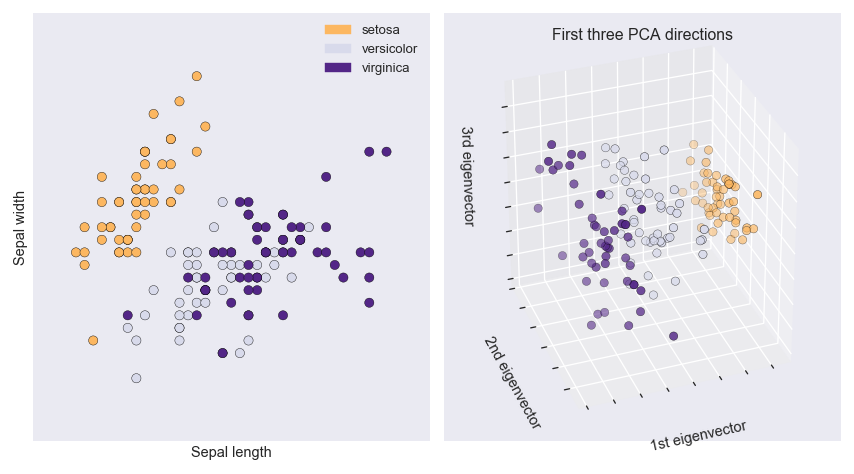

In [58]:
# http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import matplotlib.patches as mpatches

from matplotlib.colors import ListedColormap
import math
plt.close('all')

X = iris.data[:, :2]  # for first plot only two first features 
y = iris.target
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

# Color map
cmap = plt.cm.PuOr
colors = []
colors.append(cmap(0.3)); colors.append(cmap(0.6)); colors.append(cmap(0.9))
cmap = cmap.from_list('Custom cmap', colors, 3)

# Figure
fig = plt.figure(figsize=(9, 5))

# First axis
ax1 = fig.add_subplot(121)
ax1.scatter(X[:, 0], X[:, 1], c = y, cmap = cmap, edgecolor = 'k')
ax1.set_xlabel('Sepal length')
ax1.set_ylabel('Sepal width')
ax1.set_xlim(x_min, x_max)
ax1.set_ylim(y_min, y_max)
ax1.set_xticks(())
ax1.set_yticks(())

# legend
patch1 = mpatches.Patch(color = cmap(0), label = iris.target_names[0])
patch2 = mpatches.Patch(color = cmap(1), label = iris.target_names[1])
patch3 = mpatches.Patch(color = cmap(2), label = iris.target_names[2])
patches = [patch1, patch2, patch3]
ax1.legend(handles = patches, loc='upper right')

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
X_reduced = PCA(n_components=3).fit_transform(iris.data)

# Second axis
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=cmap, edgecolor='k', s=40)
ax2.set_title("First three PCA directions")
ax2.set_xlabel("1st eigenvector")
ax2.w_xaxis.set_ticklabels([])
ax2.set_ylabel("2nd eigenvector")
ax2.w_yaxis.set_ticklabels([])
ax2.set_zlabel("3rd eigenvector")
ax2.w_zaxis.set_ticklabels([])
ax2.view_init(azim = 110, elev = -150)

fig.tight_layout()


## Data pre-processing

### Scikit learn bunch object into pandas data frame

In [59]:
print('Variable ''iris'' is of type ' + str(type(iris)))
columns = list(iris.feature_names ) + ['target']
iris_df = pd.DataFrame(np.concatenate((iris.data, np.array([iris.target]).T), axis=1), columns = columns)
iris_df.head()

Variable iris is of type <class 'sklearn.datasets.base.Bunch'>


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


### Splitting data into train, and test tests

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

random_state = 3

# Full data
y = iris_df['target']
del iris_df['target']
X = iris_df
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = random_state)

# Reduced dimension data (2 dimensions, first two principal components)
X_pca = PCA(n_components=2).fit_transform(X)
X_train_pca, X_test_pca,_,_ = train_test_split(X_pca, y, random_state = random_state)

# Reduced dimension data (2 dimensions, sepal width and length)
X_reduced = X.loc[:,['sepal length (cm)', 'sepal width (cm)']].values
X_train_reduced, X_test_reduced,_,_ = train_test_split(X_reduced, y, random_state = random_state)


display_side_by_side(pd.DataFrame(X_train).head(2), pd.DataFrame(X_train_pca).head(2), pd.DataFrame(X_train_reduced).head(2))


sepal length (cm) 
 sepal width (cm) 
 petal length (cm) 
 petal width (cm) 
 
 
 
 
 111 
 6.4 
 2.7 
 5.3 
 1.9 
 
 
 68 
 6.2 
 2.2 
 4.5 
 1.5 
 
 
 
 
 
 
 0 
 1 
 
 
 
 
 0 
 1.802340 
 -0.216155 
 
 
 1 
 0.942362 
 -0.541822 
 
 
 
 
 
 
 0 
 1 
 
 
 
 
 0 
 6.4 
 2.7 
 
 
 1 
 6.2 
 2.2

<h2>Logistic regression</h2>

Confusion matrix for full model
[[13  0  0]
 [ 0 11  5]
 [ 0  0  9]]
Confusion matrix for reduced dimension (pca) model
[[13  0  0]
 [ 0  9  7]
 [ 0  0  9]]
Confusion matrix for reduced dimension (sepal width and height) model
[[13  0  0]
 [ 1  2 13]
 [ 0  0  9]]


<IPython.core.display.Javascript object>


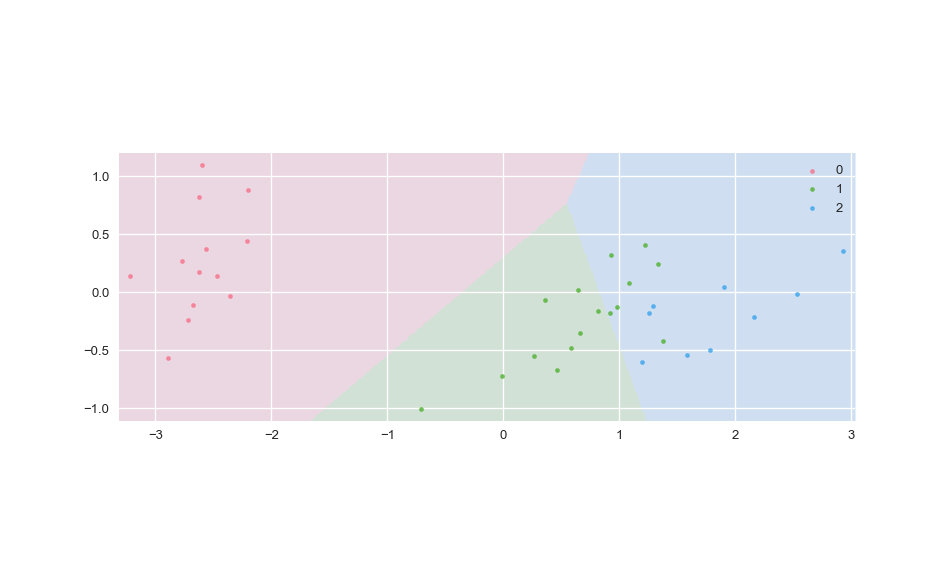

<IPython.core.display.Javascript object>


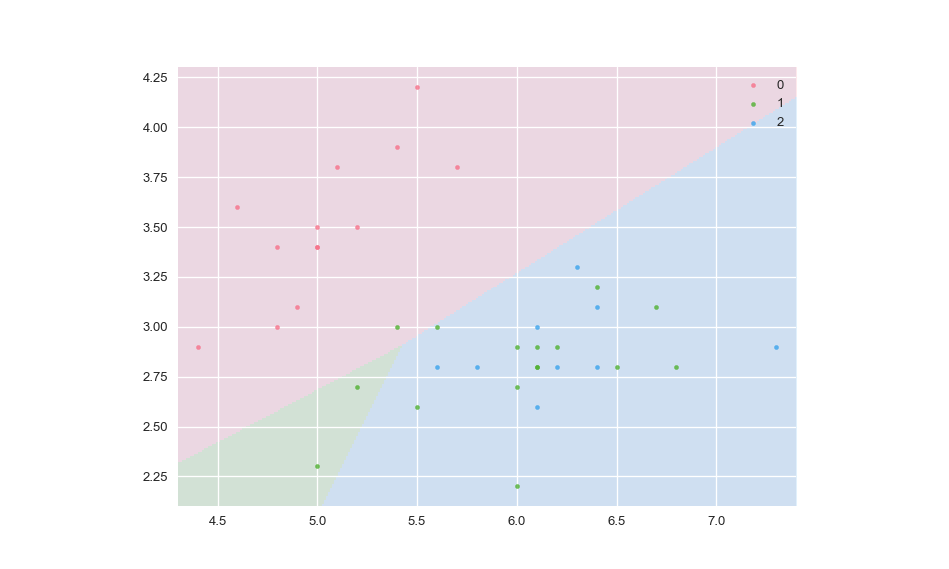

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Observations known to be in group i but predicted to be in group j
print('Confusion matrix for full model')
print(confusion_matrix(y_test.values, y_pred))

model_pca = LogisticRegression()
model_pca.fit(X_train_pca, y_train)
y_pred_pca = model_pca.predict(X_test_pca)

print('Confusion matrix for reduced dimension (pca) model')
print(confusion_matrix(y_test.values, y_pred_pca))

model_reduced = LogisticRegression()
model_reduced.fit(X_train_reduced, y_train)
y_pred_reduced = model_reduced.predict(X_test_reduced)

print('Confusion matrix for reduced dimension (sepal width and height) model')
print(confusion_matrix(y_test.values, y_pred_reduced))

# Plot decision boundaries
plot_decision_boundaries(X_test_pca, y_test, model_pca)

# Plot decision boundaries
plot_decision_boundaries(X_test_reduced, y_test, model_reduced)


### K-nearest neighbours

K-nearest neighbours needs some data pre-processing. Since it relies on some distance measure between features, we need make sure that features are on comparable scale

Full model accuracy is 0.95
Confusion matrix for full model
[[15  0  0]
 [ 0 10  2]
 [ 0  0 11]]
--------------------------------------------------
PCA-readuced model accuracy is 0.95
Confusion matrix for PCA-reduced model
[[15  0  0]
 [ 0 10  2]
 [ 0  0 11]]
--------------------------------------------------
Readuced model (only sepal width and length) accuracy is 0.66
Confusion matrix for PCA-reduced model
[[14  1  0]
 [ 0  7  5]
 [ 0  7  4]]


<IPython.core.display.Javascript object>


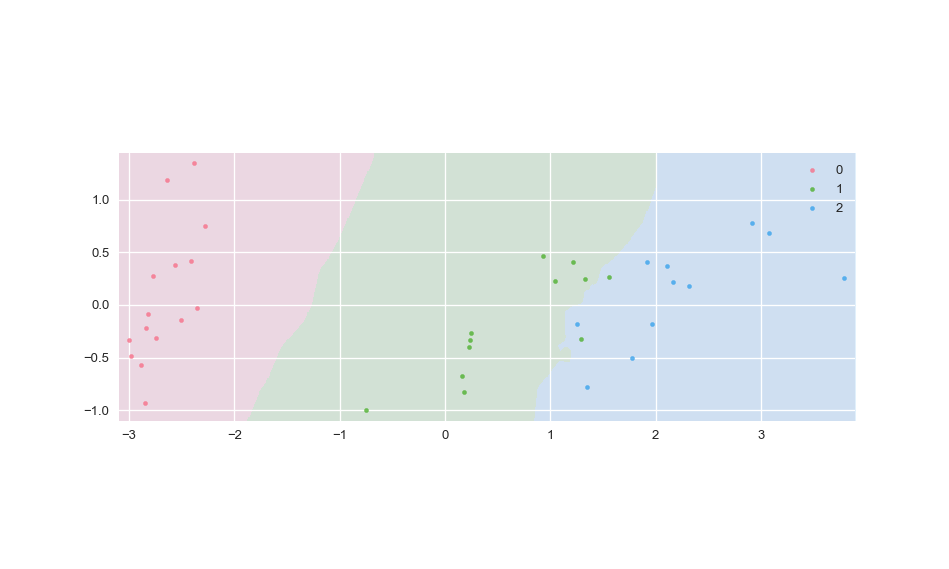

<IPython.core.display.Javascript object>


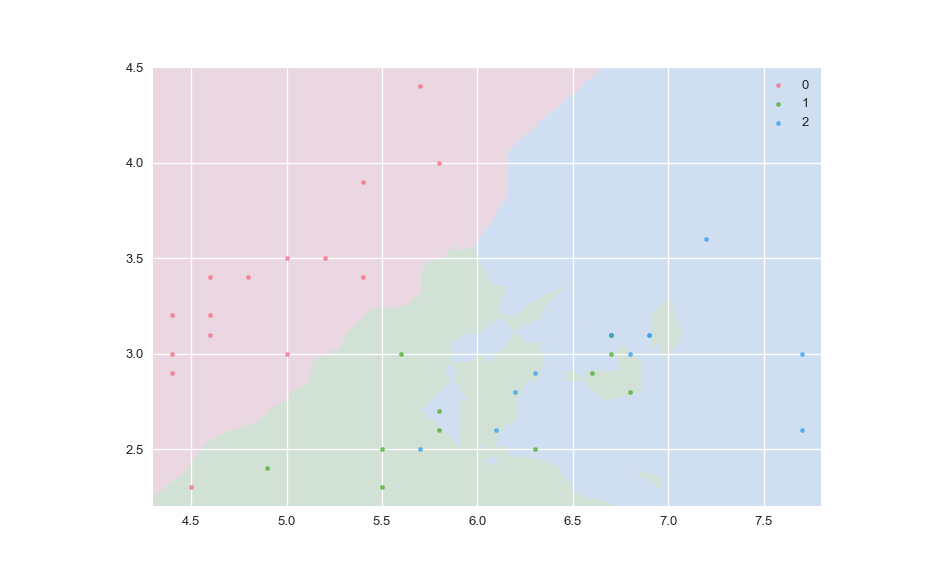

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

n_neighbors = 3

# Full model
model = KNeighborsClassifier(n_neighbors = n_neighbors)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('Full model accuracy is {:0.2f}'.format(accuracy_score(y_test, y_pred)))
print('Confusion matrix for full model')
print(confusion_matrix(y_test.values, y_pred))
print('-'*50)

# PCA-reduced model
model_pca = KNeighborsClassifier(n_neighbors = n_neighbors)
model_pca.fit(X_train_pca,y_train)
y_pred_pca = model_pca.predict(X_test_pca)
print('PCA-readuced model accuracy is {:0.2f}'.format(accuracy_score(y_test, y_pred_pca)))
print('Confusion matrix for PCA-reduced model')
print(confusion_matrix(y_test.values, y_pred_pca))
print('-'*50)

# Reduced model with only sepal width and length
model_reduced = KNeighborsClassifier(n_neighbors = n_neighbors)
model_reduced.fit(X_train_reduced,y_train)
y_pred_reduced = model_reduced.predict(X_test_reduced)
print('Readuced model (only sepal width and length) accuracy is {:0.2f}'.format(accuracy_score(y_test, y_pred_reduced)))
print('Confusion matrix for PCA-reduced model')
print(confusion_matrix(y_test.values, y_pred_reduced))


plot_decision_boundaries(X_test_pca, y_test, model_pca)
plot_decision_boundaries(X_test_reduced, y_test, model_reduced)

# Stuff to add

Validation curve: sklearn.model_selection.validation_curve<br>
Cross-validation: sklearn.model_selection.cross_val_score<br>
Pipelines<br>
Linear SVMs<br>
Kernelized SVMs<br>
Code to plot 2-dimensional decision regions in SVM<br>
Decisions trees and code to plot them, feature importance

Same kind of plot as in Course 3 Classifier visualization for probabilities. Works with binary target